 ### Importing the libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Dataset

In [82]:
df1=pd.read_csv("deliveries.csv")
df2=pd.read_csv("matches.csv")
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Checking for Null values in the Data

In [83]:
df2.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [84]:
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [85]:
df2[df2.city.isnull()]
df2[df2.venue == 'Dubai International Cricket Stadium']

df2.city.replace(np.nan,'UAE',inplace = True)

In [10]:
df2.drop(['id','umpire3'],axis = 1,inplace = True)

In [86]:
df2.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [89]:
match=df2.copy()

In [90]:
df2[df2['player_of_match'].isnull()]

df2.drop([300,545,570],inplace=True)

In [91]:
df2[df2['umpire2'].isnull()]

df2.umpire1.replace(np.nan,'AY Dandekar',inplace = True)
df2.umpire2.replace(np.nan,'CK Nandan',inplace = True)

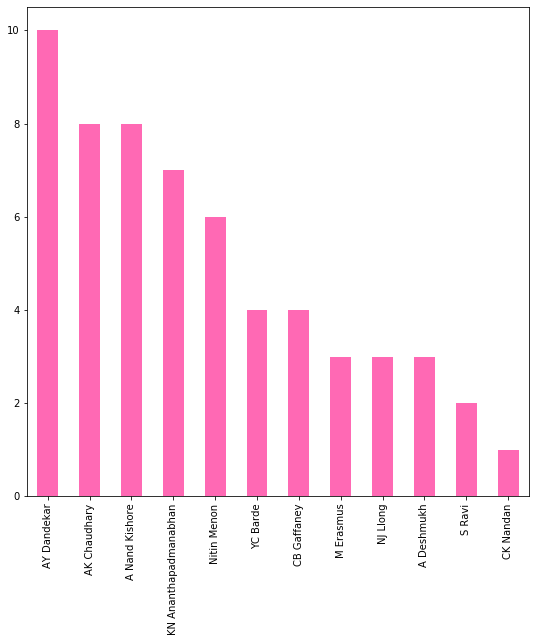

In [150]:
df2[df2['season']==2017]['umpire1'].value_counts().plot(kind='bar',color='hotpink')
plt.show()

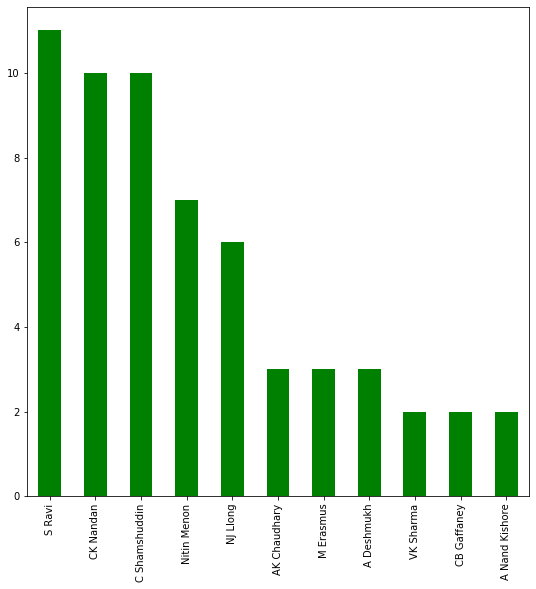

In [93]:
df2[df2['season']==2017]['umpire2'].value_counts().plot(kind='bar',color='green')

# Real Insights Starts from here

## Most Man of The Match won by a player in IPL

### Christopher Henry Gayle has won the most Man of the Match awards.

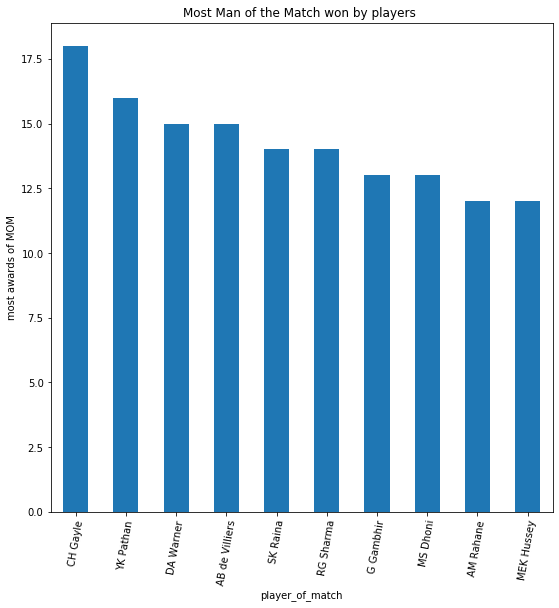

In [94]:
a=df2.groupby('player_of_match')['player_of_match'].count()
a.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Most Man of the Match won by players ")
plt.ylabel('most awards of MOM')
plt.xticks(rotation = 80)
plt.show()

## Most matches won by a Team

### Mumbai Indians won most of the matches

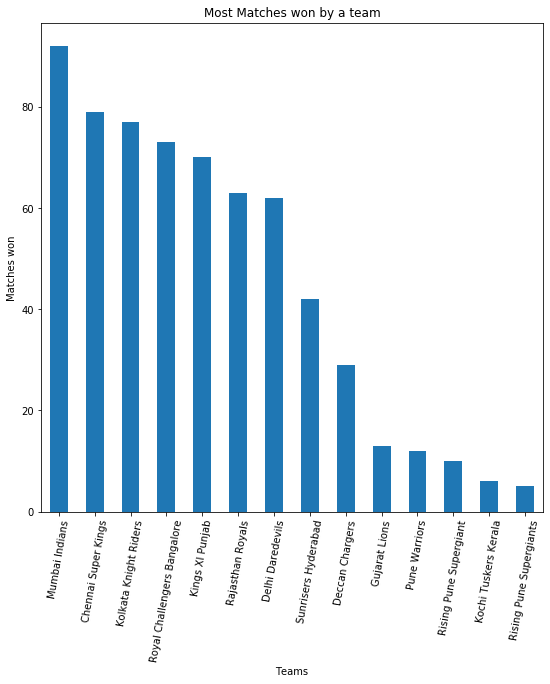

In [95]:
df2['winner'].value_counts().plot(kind = 'bar')
plt.ylabel('Matches won')
plt.xlabel('Teams')
plt.title('Most Matches won by a team')
plt.xticks(rotation = 80)
plt.show()

## Matches per IPL season

### 2012 and 2013 seasons hosted the max number of matches

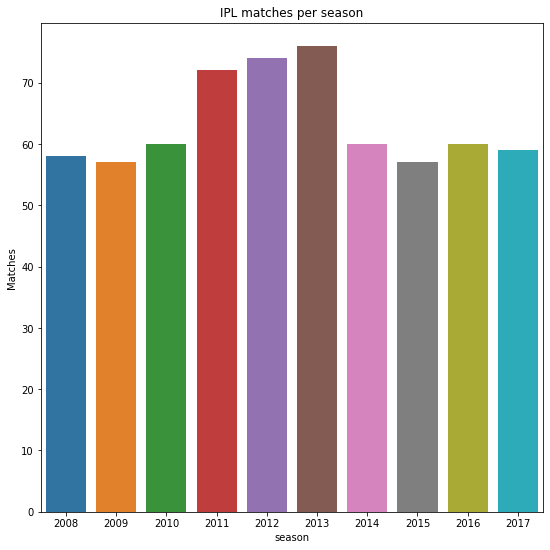

In [96]:
sns.countplot(df2.season)
plt.ylabel('Matches')
plt.title('IPL matches per season')
plt.show()

In [97]:
def win(x):
    if x > 0:
        return "bat first"
    else:
        return "field first"

In [98]:
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,AY Dandekar,CK Nandan,NaN


In [99]:
df2['win_by'] = df2['win_by_runs'].apply(win)

## Toss Factor in IPL Matches

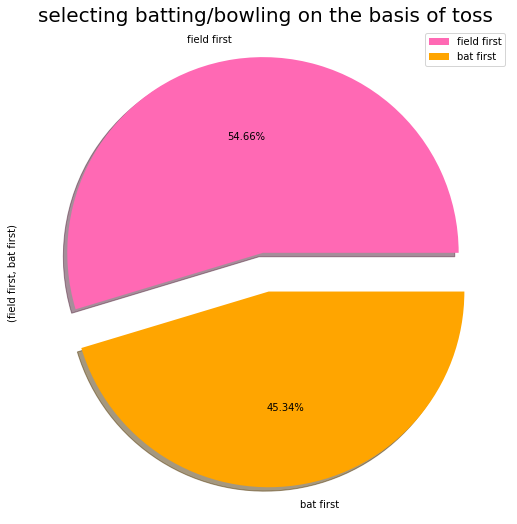

In [100]:
colors = ['hotpink', 'orange']
labels = "field first", "bat first"
df2['win_by'].value_counts().plot(kind='pie',colors=colors,label=labels,shadow = True, autopct = '%.2f%%',explode=[0.1,0.1])
plt.title('selecting batting/bowling on the basis of toss', fontsize = 20)
plt.rcParams['figure.figsize'] =(9,9)
plt.legend()
plt.show()

## Fielding team has an upper edge on winning Ratio

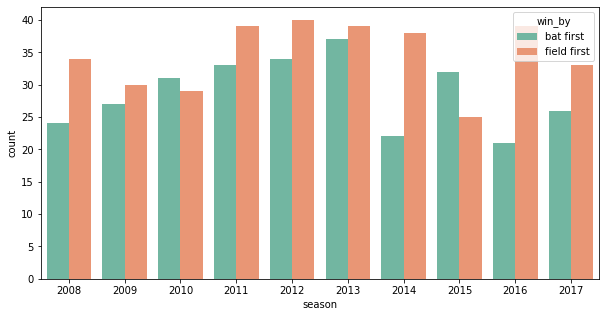

In [101]:
plt.figure(figsize = (10,5))
sns.countplot('season', hue ='win_by',data = df2,palette = "Set2")
plt.show()

#### In Most cases the team that was chose to Field first has won the match

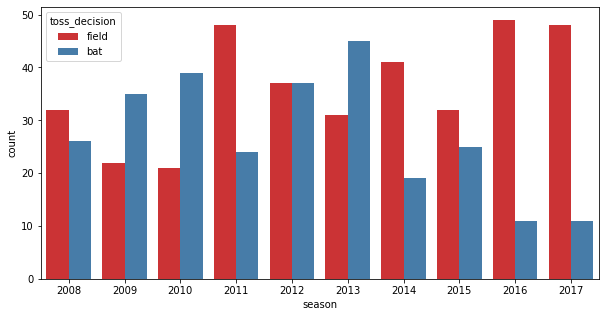

In [102]:
plt.figure(figsize = (10,5))
sns.countplot('season', hue ='toss_decision',data = df2,palette = "Set1")
plt.show()

## Purple and Orange Caps

### Virat Kohli was the show stealer in 2016 IPL

In [103]:
season = df2[['id','season','winner']]

In [104]:
df3=df1.merge(season,how = 'inner',right_on = 'id',left_on = 'match_id')

In [106]:
df3.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


<Figure size 576x144 with 0 Axes>

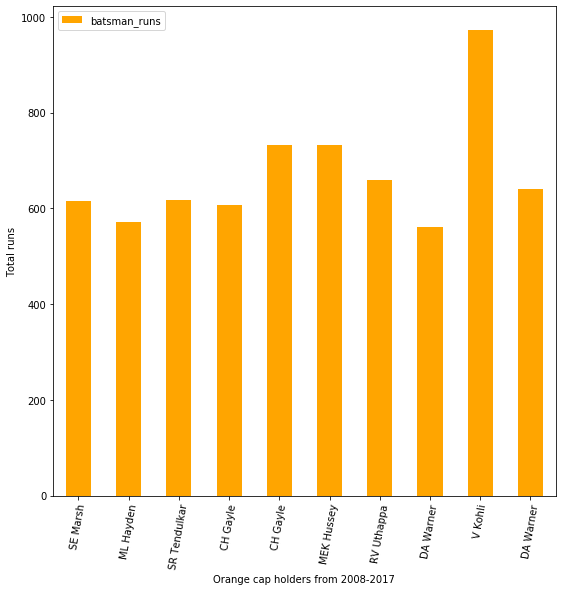

In [110]:
plt.figure(figsize = (8,2))
Season_orange_cap = df3.groupby(["season","batsman"])["batsman_runs"].sum().reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
Season_orange_cap= Season_orange_cap.drop_duplicates(subset=["season"],keep="first").sort_values(by="season").reset_index(drop=True)
Season_orange_cap.plot('batsman','batsman_runs',color='orange',kind='bar')
plt.xticks(rotation=80)
plt.ylabel('Total runs')
plt.xlabel('Orange cap holders from 2008-2017')
plt.show()

In [112]:
Season_orange_cap

,season,batsman,batsman_runs
0,2008,SE Marsh,616
1,2009,ML Hayden,572
2,2010,SR Tendulkar,618
3,2011,CH Gayle,608
4,2012,CH Gayle,733
5,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,V Kohli,973
9,2017,DA Warner,641


### Purple cap

### DJ Bravo is the highest wicket taker

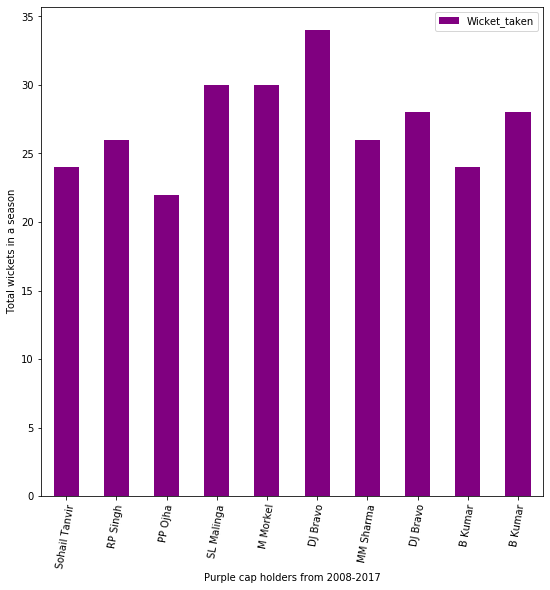

In [113]:
Season_purple_cap= df3.groupby(["season","bowler"])["dismissal_kind"].agg('count').reset_index().sort_values(by="dismissal_kind",ascending=False).reset_index(drop=True)
Season_purple_cap= Season_purple_cap.drop_duplicates(subset=["season"],keep="first").sort_values(by="season").reset_index(drop=True)
Season_purple_cap.columns= ["Season","Bowler","Wicket_taken"]
Season_purple_cap.plot('Bowler','Wicket_taken',color='purple',kind='bar')
plt.xticks(rotation=80)
plt.ylabel('Total wickets in a season')
plt.xlabel('Purple cap holders from 2008-2017')
plt.show()

In [114]:
Season_purple_cap

,Season,Bowler,Wicket_taken
0,2008,Sohail Tanvir,24
1,2009,RP Singh,26
2,2010,PP Ojha,22
3,2011,SL Malinga,30
4,2012,M Morkel,30
5,2013,DJ Bravo,34
6,2014,MM Sharma,26
7,2015,DJ Bravo,28
8,2016,B Kumar,24
9,2017,B Kumar,28


## IPL Winners

In [115]:
final_matches=df2.drop_duplicates('season', keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


## Out of 10 Seasons , 7 times the toss winner captain in the final has won the match

In [118]:
final_matches[final_matches.toss_winner == final_matches.winner]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,win_by
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN,bat first
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN,field first
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN,bat first
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN,bat first
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN,bat first
516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN,field first
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN,bat first


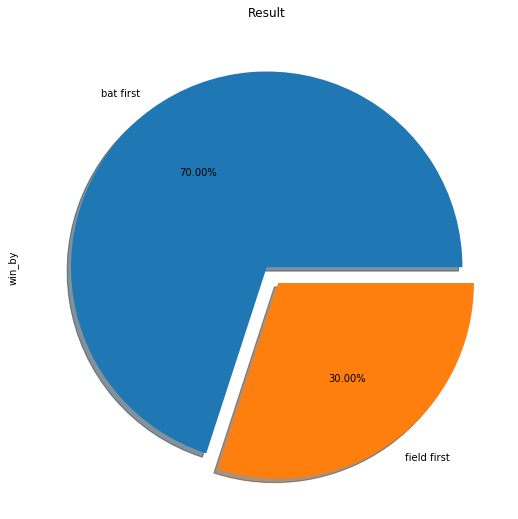

In [119]:
final_matches.win_by.value_counts().plot(kind = 'pie',autopct = '%.2f%%',shadow = True,explode = [0,0.1])
plt.title('Result')
plt.show()

### Mumbai Indians has won most of the times !!!

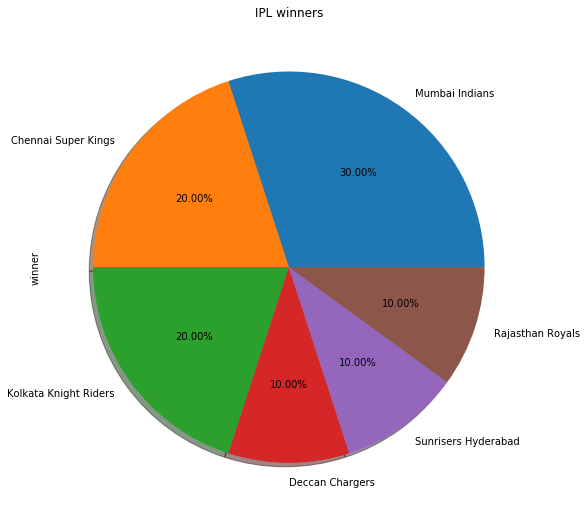

In [120]:
final_matches.winner.value_counts().plot(kind = 'pie',autopct = '%0.2f%%',shadow = True)
plt.title('IPL winners')
plt.show()

## Boundaries

### Gautam Gambhir hit max number of boundaries

In [121]:
fours = df3[df3.batsman_runs == 4]

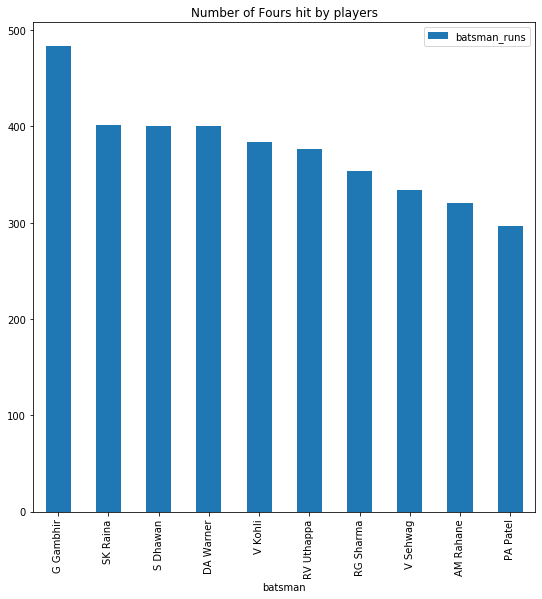

In [132]:
fours.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.legend()
plt.title('Number of Fours hit by players')
plt.show()

## Six

## Undoubtedly Chris Gayle is the BOSS

In [134]:
six = df3[df3.batsman_runs == 6]

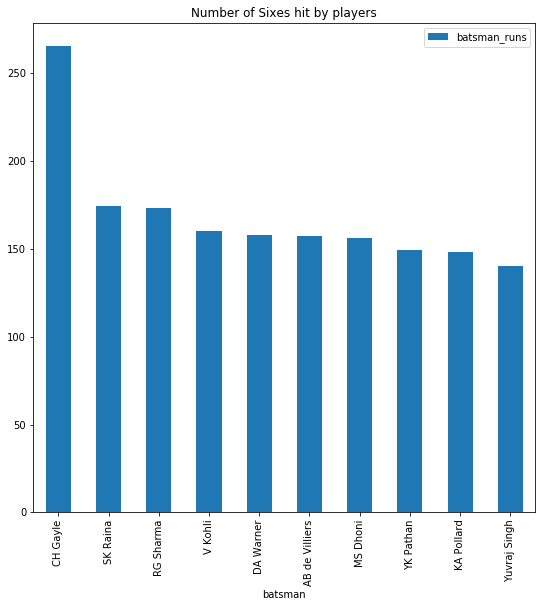

In [136]:
six.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.legend()
plt.title('Number of Sixes hit by players')
plt.show()

## Leading Run Scorers in IPL

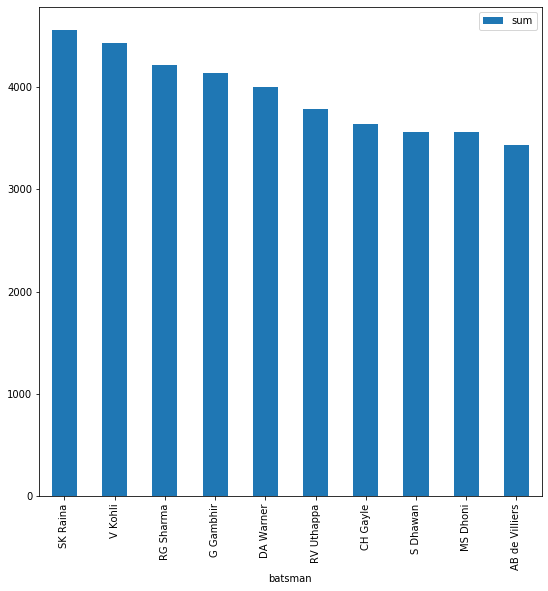

,batsman,sum
0,SK Raina,4548
1,V Kohli,4421
2,RG Sharma,4207
3,G Gambhir,4132
4,DA Warner,3995
5,RV Uthappa,3778
6,CH Gayle,3640
7,S Dhawan,3561
8,MS Dhoni,3560
9,AB de Villiers,3429


In [137]:
batsman_score=df3.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score.iloc[:10,:].plot('batsman','sum',kind = 'bar')
plt.show()
batsman_score.iloc[:10,]

## Most Wicket Takers in IPL

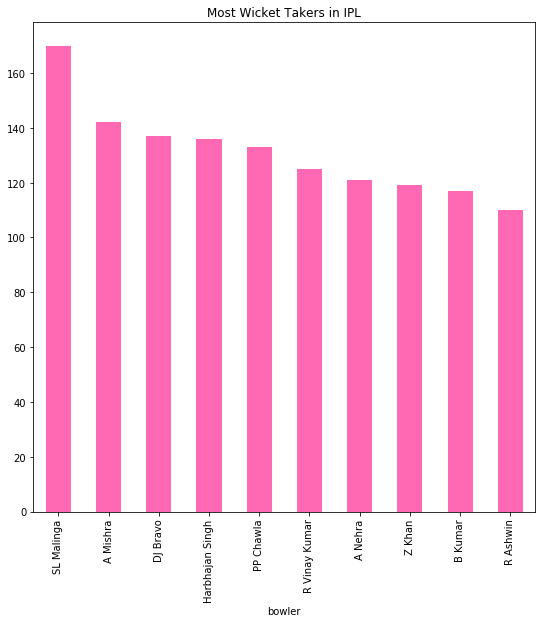

In [149]:
df3.groupby('bowler')['dismissal_kind'].count().sort_values(ascending = False).head(10).plot(kind = 'bar',color='hotpink')
plt.title("Most Wicket Takers in IPL")
plt.show()

In [147]:
pd.DataFrame(df3.groupby('bowler')['dismissal_kind'].count().sort_values(ascending = False).head(10)).rename(columns={'dismissal_kind':'Wickets'})

,Wickets
bowler,
SL Malinga,170
A Mishra,142
DJ Bravo,137
Harbhajan Singh,136
PP Chawla,133
R Vinay Kumar,125
A Nehra,121
Z Khan,119
B Kumar,117


### --------   Now you have the facts , Start choosing your Best players in Dream Eleven :) -----------